### Dependencias

In [1]:
pkg load image;
pkg load video;

# SVD e Imagenes

Sea $A \in {\rm I\!R}^{m\times n}$, la descomposición en valores singulares de A es una factorización de la forma
$$A = U \Sigma V^T$$
donde U ($m \times m$) y V ($n \times n$) son matrices ortogonales, es decir $U\cdot U^T = U^T\cdot U = I_m$ y $V\cdot V^T = V^T\cdot V = I_m$

Y $\sum \in R^{m\times n}$ es una matriz diagonal generalizada, es decir:

$$
\sum = 
\left(
	\begin{matrix}
        \sigma_1 & 0 &...& 0 &...& 0\\
        0 & \sigma_2 && && .\\
        . & . &.&&&.\\
        . & .&&\sigma_r && 0\\
        . & .&&&. & .\\
        0 & 0&.&.&.& 0\\
    \end{matrix}
\right) _{m\times n}
$$

* Los valores $\sigma _1 \ge \sigma _2 \ge ... \ge \sigma _r \ge 0$ se conocen como valores singulares de la matriz
* Si A tiene **r** valores singulares mayores que cero, entonces el rango de la matriz A es igual a **r**.
* Sea $A = U \sum V^T, r = rango (A)$
$$= [U_r U_{mr}]
\left[
\begin{matrix}
\sum_r & 0 \\
0 & 0
\end{matrix}
\right]
\left(
\begin{matrix}
V_r ^T \\
V_{mr}^T
\end{matrix}
\right)
$$ 
donde

$U = [u_1, u_2, ..., u_m] \in {\rm I\!R} ^{m\times m}, U_r = [u_1, u_2, ..., u_r] \in {\rm I\!R} ^{m\times r}$

$V = [v_1, v_2, ..., v_n] \in {\rm I\!R} ^{n\times n}, U_r = [u_1, u_2, ..., u_r] \in {\rm I\!R} ^{n\times r}$

$\sum _r = 
\left[
\begin{matrix}
\sigma_1&&&\\
&\sigma_2&&\\
&&...&\\
&&&\sigma_r\\
\end{matrix}
\right] \in {\rm I\!R} ^{r\times r}$

$= U_r\cdot \Sigma_r \cdot V_r ^T \rightarrow$ SVD económica

Por lo tanto $A=U \Sigma V^T = U_r \Sigma_r V_r ^T \rightarrow$ SVD = SVD económica



### Código en Octave

In [2]:
V=VideoReader('Imagenes/video_original.mp4');
fr=V.NumberOfFrames;  % Número de cuadros
nf=V.Height; nc=V.Width; % Dimensiones
m=nf; n=nc; % Redimensionar el tamaño;
Y = uint8(zeros(m,n, 3, fr)); 

%Leer el video y guardar los frames en la matriz Y
for i=1:fr
    Z1 = readFrame(V);
    Y(:,:,1,i) = Z1(:,:,1);
    %Y(:,:,1,i) = imresize(Z1(), [m n]); -> para tener 
end

#     Y(:,:,2) = uint8(zeros(m,n, 1))
#     Y(:,:,3) = uint8(zeros(m,n, 1))

% Crear un vieo a partir de un conjunto de imágenes en Y
video = VideoWriter('Imagenes/video_salida.mp4');

for i=1:fr
    writeVideo(video, Y(:,:,:,i));
end
close(video)

error: Opening 'Imagenes\video_original.mp4' failed : 'No such file or directory'
error: called from
    VideoReader at line 77 column 13
error: 'V' undefined near line 1 column 4
error: 'V' undefined near line 1 column 4
error: 'nf' undefined near line 1 column 3
error: 'm' undefined near line 1 column 17
error: 'fr' undefined near line 2 column 9
error: 'fr' undefined near line 1 column 9


In [3]:
% Ejemplo para probar SVD

A=rand(5,3);
s=svd(A);
[U,S,V]=svd(A);
%  U -> 25 Entradas, S -> 25 Entradas V->9 entradas. Total: 49 entradas.
[U,S,V]=svd(A,'econ');
%  U -> 15 Entradas, S -> 9 Entradas V-> 9 entradas. Total: 33 entradas.


### Código en Python

## Problema de Rango Reducido
1. **Norma de Frobenios** Sea $A \in R^{m\times n}$
$$\| A\|_f = \sqrt{\sum_{i=1} ^{m} \sum_{j=1} ^{n} a_{ij} ^2}$$
1. Sea $A \in {\rm I\!R}^{m\times n}$. Sea $0 < K \le min \{ m,n \}$. Entonces la matriz $A_k$ de rango reducido **k** es la matriz que resuelve el siguiente problema.
$$min_{rank} \| A-A_k\|_{fr}$$

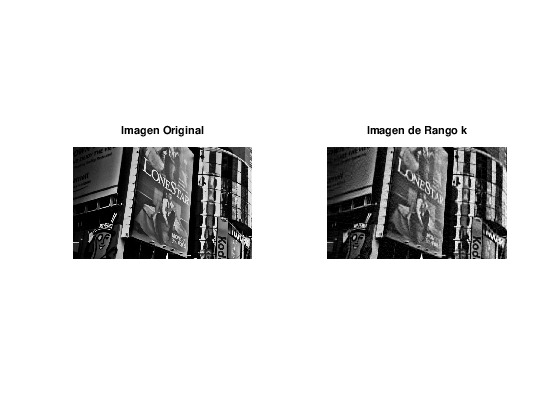

In [4]:
% Ejemplo de SVD en Imágenes
A = imread('images/imagen1.jpg')(1:600,1:960);

subplot(1,2,1);
imshow(A);
title('Imagen Original')

% Nota: Cuando se aplica SVD a una imagen, se recomienda que esté en formato
% double normalizado (es decir, que toma valor en[0,1])

A = im2double(A);
[U, S, V] = svd(A); % Calcular SVD

k=50;
Uk = U(:,1:k); % Tomar las primeras k columnas de U
Vk = V(:,1:k); % Tomar las primeras k columnas de V
Sk = S(1:k, 1:k);  % Tomar las primeras k filas y columnas de S
Ak = Uk*Sk*Vk'; % La matriz de rango k que mejor aproxima a A
Ak = im2uint8(Ak);

subplot(1,2,2);
imshow(Ak);
title('Imagen de Rango k')

% En resumen, utilizando una matriz de rango reducido con k=200 solo se necesitan 624 000 valores
% para obtener una buena aproximación de la imagen A.

% Sin comprimir, se necesitarían 2 304 000 valores para obtener la misma imagen.



### Código en Python

## Gráfica número de valores singulares vrs valores singulares
$A \in {\rm I\!R}^{5 \times 7}$


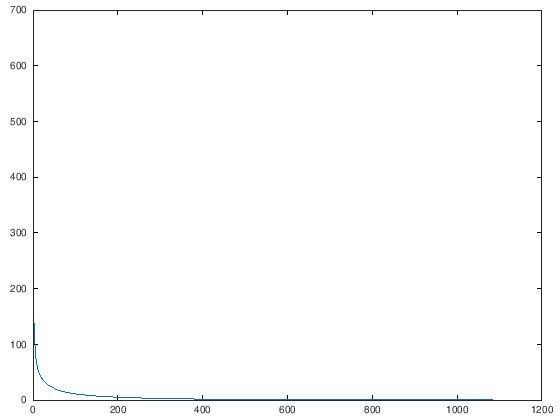

In [5]:
A = imread('images/imagen1.jpg');
A = im2double(A);
s = svd(A);

plot(1:length(s),s) % Gráfica de los Valores Singulares

### Código en Python

### Pseudoinversa de una matriz:
Sea $A \in {\rm I\!R}^{m\times n}$. Entonces la pseudionversa de A se define como $$A^\dagger = V_r \Sigma_r ^{-1}U_r ^\dagger$$
donde $U_r, \Sigma_r$ y $V_r$ son las matrices de la SVD económica de la matriz A.

**Resultados:** 
1. Es una generalización para matrices que **no** son invertibles.
1. La pseudoinversa cumple las siguientes propiedades:
$$
\begin{matrix}
    \cdot AA^\dagger A = A &&& \cdot (A^\dagger A)^\dagger = A^\dagger A \\
    \cdot A^\dagger A A^\dagger= A^\dagger &&& \cdot (AA^\dagger )^\dagger = AA^\dagger
\end{matrix}
$$
1. La pseudo inversa sirve para limpiar una imagen con ruido.

Sea A una imagen. Sea Y la imagen A con algún tipo de ruido, entonces la matriz 
$$F= AY^\dagger$$
Limpia el ruido de una imagen Y, es decir
$$
F\cdot Y \approx A \rightarrow F = filtro
$$

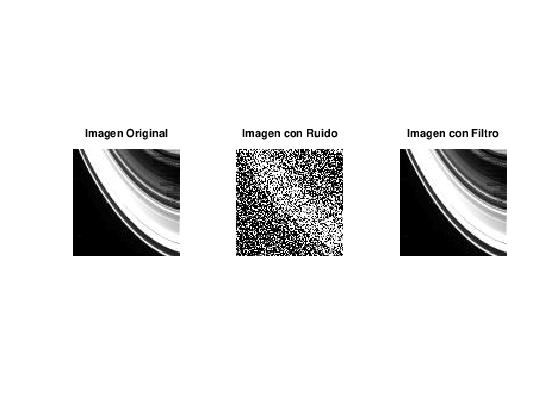

In [6]:
A = imread('images/saturno_(5).jpg');
A = im2double(A);
subplot(1,3,1);
imshow(A);
title('Imagen Original');

% Agregar ruido
[m, n] = size(A);
N = randn(m, n);
Y = A + N;
Y1 = im2uint8(Y);

subplot(1,3,2);
imshow(Y1);
title('Imagen con Ruido');

% Filtro

F = A*pinv(Y);
A_rec = F*Y; % Reconstrucción de la imagen con ruido
A_rec = im2uint8(A_rec);
subplot(1,3,3);
imshow(A_rec);
title('Imagen con Filtro');

### Código en Python

El ejemplo explicado anteriormente es meramente didactico, ya que no tiene sentido usar la imagen A para reconstruir A
Sea $\{ A_1, A_2, ..., A_n\}$ imágenes de entrenamiento y sean $\{ Y_1, Y_2, ..., Y_n\}$ imágenes con ruido de las imágenes de entrenamento.

Una manera de construir un filtro que limpie imágenes con un ruido similar a los $Y_j$, es el siguiente.
1. $$
\begin{matrix}
A_j \in {\rm I\! R}^{m \times n} \rightarrow a_j \in {\rm I\!R}^{m \cdot n}\\
A_j =[A_{j1}, A_{j2},...,A_{jn}]\\ 
&& a_j = 
\left(
\begin{matrix}
A_{j1}\\
A_{j1}\\ ...\\
A_{jn}
\end{matrix}
\right) \in {\rm I\! R}^{m \cdot n}\\
\end{matrix}
$$

1. $$
\begin{matrix}
Y_j \in {\rm I\! R}^{m \times n} \rightarrow y_j \in {\rm I\!R}^{m \cdot n}\\
&&y_j = 
\left(
\begin{matrix}
Y_{j1}\\
Y_{j1}\\ ...\\
Y_{jn}
\end{matrix}
\right) \in {\rm I\! R}^{m \cdot n}\\
\end{matrix}
$$

1. Crear matrices $$
\begin{matrix}
A = [a_1, a_2,...,a_s] \in {\rm I\! R}^{m \cdot n \times s}\\
Y = [y_1, y_2,...,y_s] \in {\rm I\! R}^{m \cdot n \times s}\\
\end{matrix}
$$

1. Un filtro que limpie imágenes similares a $Y_j$ es $$
\begin{matrix}
F = A\cdot Y^\dagger
\end{matrix}
$$

1. Supongamos que tenemos $Y^* \in {\rm I\! R}$, $Y^* \notin {y_1, y_2, ..., y_s}$ pero tiene un ruido similar.
Para limpiar la imagen $Y^*$

  1. $Y^* \in {\rm I\! R}^{m \cdot n} \rightarrow y \in {\rm I\! R}^{m \cdot n}$
  1. $a_{rec} = F\cdot Y$
  1. Convertir el vector $a_{rec}$ como matriz y mostrar.

#### Limpiar una imagen usando imágenes de entrenamiento

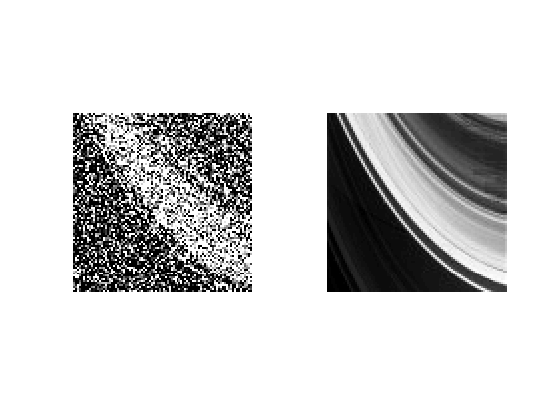

In [7]:
% Limpiar una imagen usando imágenes de entrenamiento
A = imread('images/saturno_(1).jpg');
[m n] = size(A);
s = 20; %número de muestras
A_bd = zeros(m, n, s);
Y_bd = A_bd;
A = zeros(m*n, s);
Y = zeros(m*n, s);

for i = 1:s
    t = ['images/saturno_(' num2str(i) ').jpg'];
    Aux = imread(t);
    A_bd(:,:, i) = im2double(Aux); % Matriz de tamaño mxn
    Y_bd(:,:, i) = A_bd(:,:, i) + 0.25*randn(m,n); % matriz de tamaño mxn con ruido
    
    ai = reshape(A_bd(:,:, i), [m*n 1]); % Vectorizando la matriz 
    A(:,i) = ai; % Almacenar la imagen vectorizada en la matriz A
    
    yi = reshape(Y_bd(:,:, i), [m*n 1]); % Vectorizando la matriz 
    Y(:,i) = yi; % Almacenar la imagen vectorizada en la matriz A
end

% Calcular el filtro F

F = A * pinv(Y);

% Necesitamos una imagen con ruido, que se parezca a las que están en la matriz Y_bd

Y_nueva_ruido = A_bd(:,:,5)+0.8*randn(m,n);
subplot(1,2,1);
imshow(Y_nueva_ruido);
% P1: Vectorizar Y_nueva_ruido
y_nr = reshape(Y_nueva_ruido, [m*n 1]);

% P2: Multiplicar por el filtro F
a_rec = F*y_nr;

% P3: Redimensionar el vector como una matriz
A_rec = reshape(a_rec, [m n]);

subplot(1,2,2);
imshow(A_rec);


### Código en Python